# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [9]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [10]:
# Your code here
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train.size

153600000

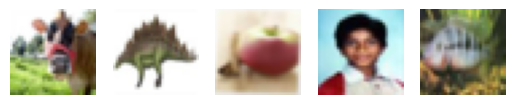

In [ ]:
# Displaying the first five images from the dataset. 
import matplotlib.pyplot as plt 

for i in range(5): 
    plt.subplot(1,5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [13]:
# Your code here
import numpy as np 

mean = np.mean(x_train, axis = (0,1,2))
std = np.std(x_train, axis = (0,1,2))

x_train_normalized = (x_train - mean)/std
x_test_normalized = (x_test - mean)/std

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.790284841440615..2.0245562281644536].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0868328131812286..2.0245562281644536].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4385588273109218..1.9563618308104653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8967831139556384..2.0245562281644536].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4713775591759934..1.4211265919174538].


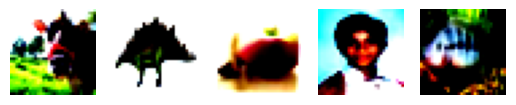

In [ ]:
# Testing images to see if they still work after being resized 
for i in range(5): 
    plt.subplot(1,5, i+1)
    plt.imshow(x_train_normalized[i])
    plt.axis('off')
plt.show()

In [ ]:
#one hot encoding 
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [17]:
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, y_train, test_size=0.2, random_state=42
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Define the CNN architecture
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))

# Output layer with softmax activation for 100 classes
model.add(Dense(100, activation='softmax'))

c:\Users\JustinOkeke\Continuum\envs\data_exploration\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [22]:
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [23]:
# Your code here
# Train the model
history = model.fit(
    x_train_split, y_train_split,              # Training data
    epochs=20,                                # Number of epochs
    batch_size=32,                            # Batch size
    validation_data=(x_val_split, y_val_split),  # Validation data
    verbose=2                                 # Print progress for each epoch
)


Epoch 1/20
1250/1250 - 10s - 8ms/step - accuracy: 0.1782 - loss: 3.4923 - val_accuracy: 0.2854 - val_loss: 2.9070
Epoch 2/20
1250/1250 - 9s - 7ms/step - accuracy: 0.3415 - loss: 2.5925 - val_accuracy: 0.3559 - val_loss: 2.5291
Epoch 3/20
1250/1250 - 9s - 7ms/step - accuracy: 0.4410 - loss: 2.1210 - val_accuracy: 0.3973 - val_loss: 2.3782
Epoch 4/20
1250/1250 - 9s - 7ms/step - accuracy: 0.5278 - loss: 1.7344 - val_accuracy: 0.4012 - val_loss: 2.4382
Epoch 5/20
1250/1250 - 9s - 8ms/step - accuracy: 0.6113 - loss: 1.3733 - val_accuracy: 0.4033 - val_loss: 2.4930
Epoch 6/20
1250/1250 - 9s - 8ms/step - accuracy: 0.7010 - loss: 1.0281 - val_accuracy: 0.3926 - val_loss: 2.8074
Epoch 7/20
1250/1250 - 10s - 8ms/step - accuracy: 0.7817 - loss: 0.7366 - val_accuracy: 0.3903 - val_loss: 3.1623
Epoch 8/20
1250/1250 - 10s - 8ms/step - accuracy: 0.8317 - loss: 0.5394 - val_accuracy: 0.3915 - val_loss: 3.7233
Epoch 9/20
1250/1250 - 10s - 8ms/step - accuracy: 0.8737 - loss: 0.4051 - val_accuracy: 0.374

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Your code here
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# pretty low accuracy

313/313 - 1s - 3ms/step - accuracy: 0.3724 - loss: 7.0604
Test Accuracy: 37.24%
Test Loss: 7.0604


In [26]:
# Trying again with new optimizer parameters - specifically Adam's learning rate 

# Adjust the learning rate (e.g., try 0.0005 or 0.0001)
optimizer = Adam(learning_rate=0.0005)  # Decrease learning rate if it's too high

# Recompile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_split, y_train_split,              # Training data
    epochs=20,                                # Number of epochs
    batch_size=32,                            # Batch size
    validation_data=(x_val_split, y_val_split),  # Validation data
    verbose=2                                 # Print progress for each epoch
)


Epoch 1/20
1250/1250 - 11s - 9ms/step - accuracy: 0.9786 - loss: 0.0707 - val_accuracy: 0.3854 - val_loss: 7.6304
Epoch 2/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9887 - loss: 0.0383 - val_accuracy: 0.3845 - val_loss: 8.0523
Epoch 3/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.3800 - val_loss: 8.4906
Epoch 4/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9868 - loss: 0.0426 - val_accuracy: 0.3842 - val_loss: 8.3830
Epoch 5/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.3732 - val_loss: 8.6092
Epoch 6/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.3752 - val_loss: 8.9716
Epoch 7/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9875 - loss: 0.0433 - val_accuracy: 0.3751 - val_loss: 9.1161
Epoch 8/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9883 - loss: 0.0440 - val_accuracy: 0.3753 - val_loss: 9.4198
Epoch 9/20
1250/1250 - 10s - 8ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 

In [27]:
# Your code here
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.3724 - loss: 10.9378
Test Accuracy: 37.24%
Test Loss: 10.9378


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

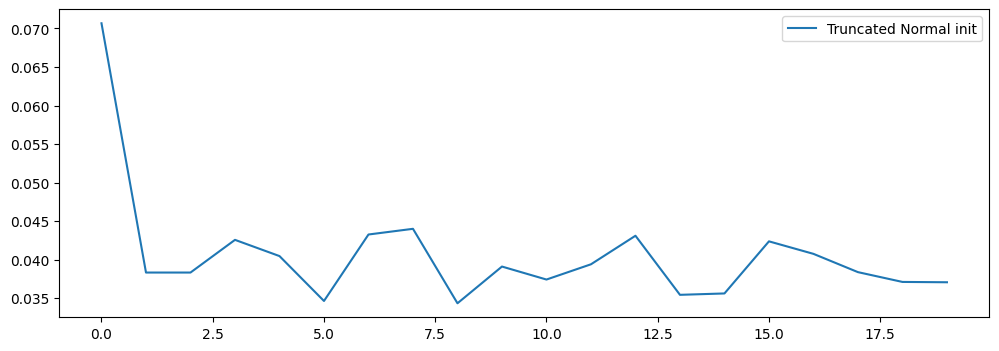

In [28]:
# Your code here
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [33]:
# Your code here

# I will be attempting data augumentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # Randomly shift images vertically by up to 20%
    shear_range=0.2,        # Randomly apply shear transformation
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill missing pixels after transformations with nearest pixel value
)

# Fit the datagen on the training data (only the training set)
datagen.fit(x_train_normalized)

# Train the model with augmented data
history = model.fit(
    datagen.flow(x_train_normalized, y_train, batch_size=32), # Use the augmented data
    epochs=30,         # Train for 30 epochs (you can adjust based on performance)
    validation_data=(x_val_split, y_val_split), # Validation data for monitoring
    verbose=2
)


Epoch 1/30


c:\Users\JustinOkeke\Continuum\envs\data_exploration\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 - 20s - 13ms/step - accuracy: 0.2097 - loss: 3.5874 - val_accuracy: 0.3143 - val_loss: 2.8129
Epoch 2/30
1563/1563 - 20s - 13ms/step - accuracy: 0.2800 - loss: 2.9380 - val_accuracy: 0.3541 - val_loss: 2.6329
Epoch 3/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3135 - loss: 2.7468 - val_accuracy: 0.3889 - val_loss: 2.3971
Epoch 4/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3354 - loss: 2.6377 - val_accuracy: 0.3954 - val_loss: 2.4008
Epoch 5/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3499 - loss: 2.5477 - val_accuracy: 0.4289 - val_loss: 2.2228
Epoch 6/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3658 - loss: 2.4560 - val_accuracy: 0.4330 - val_loss: 2.1811
Epoch 7/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3807 - loss: 2.3951 - val_accuracy: 0.4554 - val_loss: 2.0802
Epoch 8/30
1563/1563 - 20s - 13ms/step - accuracy: 0.3909 - loss: 2.3372 - val_accuracy: 0.4604 - val_loss: 2.0915
Epoch 9/30
1563/1563 - 20s - 13ms/step - accuracy: 0.4019 - loss: 2.2886 - val_accuracy: 0.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [34]:
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.4694 - loss: 2.1694
Test Accuracy: 46.94%
Test Loss: 2.1694


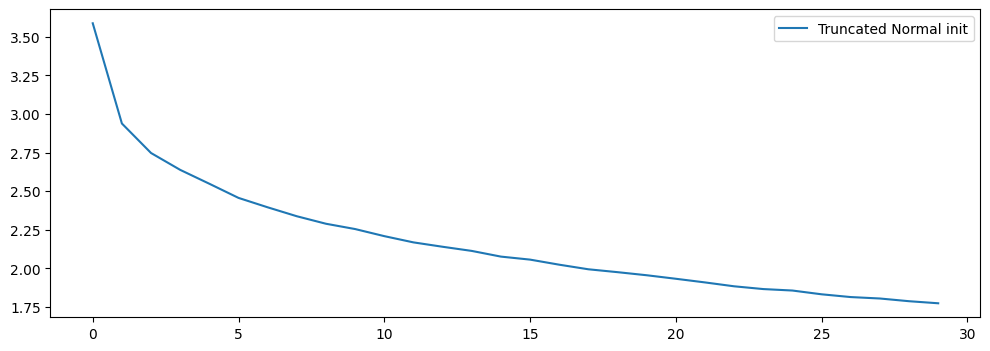

In [35]:
# Your code here
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The data augumentation improved the performance of the model by about 10%. It also decreases the peaks seen in the loss function graph, making it a lot smoother. By increasing the dataset size, the model was able to learn more diverse features, and generalize its predictions better as a result. There is room for improvement, as 46% is not exactly acceptable for a model. I would try making a more complex neural network (more layers) or using a different optimizer in the future. 

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.